# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_units=10):
    input_layer = keras.layers.Input(input_shape)
    x=keras.layers.Dense(activation="relu",units=512)(input_layer)
    x=keras.layers.Dense(activation="relu",units=256)(x)
    x=keras.layers.Dense(activation="relu",units=128)(x)
    out=keras.layers.Dense(activation="softmax",units=output_units)(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])   
    return model

In [6]:
## 超參數設定
from keras.optimizers import SGD,Adam,RMSprop
results = {}

opt=[SGD,Adam,RMSprop]

learning=[1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
for opt in opt:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %s" % (opt))
    model = build_mlp(input_shape=x_train.shape[1:])
    for lr in learning:
        print("Experiment with OPT = %s and lr = %.6f" % (opt,lr))
        #optimizer = keras.optimizers.SGD(lr=lr, nesterov=n, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt(lr=lr))

        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-opt-%s-lr-%s" % (opt,str(lr))
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 

Experiment with MOMENTUM = <class 'keras.optimizers.SGD'>
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Experiment with OPT = <class 'keras.optimizers.SGD'> and lr = 0.001000

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 69us/step - loss: 2.2594 - accuracy: 0.1571 - val_loss: 2.2105 - val_accuracy: 0.1958
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.1769 - accuracy: 0.2254 - val_loss: 2.1442 - val_accuracy: 0.2522
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.1172 - accuracy: 0.2601 - val_loss: 2.0896 - val_accuracy: 0.2727
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.0681 - accuracy: 0.2779 - val_loss: 2.0460 - val_accuracy: 0.2865
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.0301 - accuracy: 0.2921 - val_loss: 2.0125 - val_accuracy: 0.2979
Epoc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6656 - accuracy: 0.4223 - val_loss: 1.6707 - val_accuracy: 0.4184
Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6651 - accuracy: 0.4217 - val_loss: 1.6704 - val_accuracy: 0.4197
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6647 - accuracy: 0.4231 - val_loss: 1.6700 - val_accuracy: 0.4195
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.6644 - accuracy: 0.4227 - val_loss: 1.6697 - val_accuracy: 0.4203
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6641 - accuracy: 0.4227 - val_loss: 1.6696 - val_accuracy: 0.4202
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6637 - accuracy: 0.4234 - val_loss: 1.6691 - val_accuracy: 0.4199
Epoch 7/50
50000/50000 [==============================] - 3s 59us/st

50000/50000 [==============================] - 3s 58us/step - loss: 1.6489 - accuracy: 0.4279 - val_loss: 1.6556 - val_accuracy: 0.4243
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6489 - accuracy: 0.4279 - val_loss: 1.6556 - val_accuracy: 0.4240
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6488 - accuracy: 0.4279 - val_loss: 1.6556 - val_accuracy: 0.4241
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6488 - accuracy: 0.4280 - val_loss: 1.6556 - val_accuracy: 0.4237
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6488 - accuracy: 0.4280 - val_loss: 1.6555 - val_accuracy: 0.4242
Epoch 10/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6487 - accuracy: 0.4277 - val_loss: 1.6555 - val_accuracy: 0.4241
Epoch 11/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6487 - accuracy: 0.4278 - val_loss: 1.6555 - v

50000/50000 [==============================] - 3s 69us/step - loss: 1.3851 - accuracy: 0.5053 - val_loss: 1.4314 - val_accuracy: 0.4951
Epoch 10/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.3563 - accuracy: 0.5154 - val_loss: 1.4063 - val_accuracy: 0.4974
Epoch 11/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.3230 - accuracy: 0.5283 - val_loss: 1.4673 - val_accuracy: 0.4802
Epoch 12/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.3061 - accuracy: 0.5350 - val_loss: 1.4684 - val_accuracy: 0.4905
Epoch 13/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.2923 - accuracy: 0.5389 - val_loss: 1.3819 - val_accuracy: 0.5131
Epoch 14/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2625 - accuracy: 0.5504 - val_loss: 1.4428 - val_accuracy: 0.4934
Epoch 15/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.2367 - accuracy: 0.5595 - val_loss: 1.3679

50000/50000 [==============================] - 3s 68us/step - loss: 0.3997 - accuracy: 0.8721 - val_loss: 1.9472 - val_accuracy: 0.5185
Epoch 14/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3936 - accuracy: 0.8750 - val_loss: 1.9584 - val_accuracy: 0.5210
Epoch 15/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.3908 - accuracy: 0.8757 - val_loss: 1.9661 - val_accuracy: 0.5199
Epoch 16/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3857 - accuracy: 0.8780 - val_loss: 1.9878 - val_accuracy: 0.5160
Epoch 17/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3832 - accuracy: 0.8789 - val_loss: 1.9947 - val_accuracy: 0.5155
Epoch 18/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3789 - accuracy: 0.8808 - val_loss: 2.0044 - val_accuracy: 0.5159
Epoch 19/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.3751 - accuracy: 0.8820 - val_loss: 2.0132

50000/50000 [==============================] - 3s 68us/step - loss: 0.2541 - accuracy: 0.9299 - val_loss: 2.4068 - val_accuracy: 0.5099
Epoch 18/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2537 - accuracy: 0.9301 - val_loss: 2.4100 - val_accuracy: 0.5105
Epoch 19/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2533 - accuracy: 0.9300 - val_loss: 2.4124 - val_accuracy: 0.5105
Epoch 20/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2529 - accuracy: 0.9304 - val_loss: 2.4108 - val_accuracy: 0.5093
Epoch 21/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2527 - accuracy: 0.9302 - val_loss: 2.4186 - val_accuracy: 0.5101
Epoch 22/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.2522 - accuracy: 0.9309 - val_loss: 2.4154 - val_accuracy: 0.5102
Epoch 23/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.2521 - accuracy: 0.9310 - val_loss: 2.4176

50000/50000 [==============================] - 3s 65us/step - loss: 1.2062 - accuracy: 0.5704 - val_loss: 1.5434 - val_accuracy: 0.4802
Epoch 22/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1907 - accuracy: 0.5737 - val_loss: 1.4774 - val_accuracy: 0.4966
Epoch 23/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1734 - accuracy: 0.5828 - val_loss: 1.5249 - val_accuracy: 0.4917
Epoch 24/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1530 - accuracy: 0.5897 - val_loss: 1.5277 - val_accuracy: 0.4869
Epoch 25/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1365 - accuracy: 0.5941 - val_loss: 1.6255 - val_accuracy: 0.4636
Epoch 26/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1180 - accuracy: 0.6002 - val_loss: 1.5156 - val_accuracy: 0.4832
Epoch 27/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.0955 - accuracy: 0.6099 - val_loss: 1.6274

50000/50000 [==============================] - 3s 64us/step - loss: 0.3867 - accuracy: 0.8781 - val_loss: 2.2068 - val_accuracy: 0.5170
Epoch 26/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.3821 - accuracy: 0.8787 - val_loss: 2.1937 - val_accuracy: 0.5142
Epoch 27/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3793 - accuracy: 0.8793 - val_loss: 2.2203 - val_accuracy: 0.5171
Epoch 28/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3748 - accuracy: 0.8821 - val_loss: 2.2194 - val_accuracy: 0.5139
Epoch 29/50
50000/50000 [==============================] - 3s 70us/step - loss: 0.3715 - accuracy: 0.8833 - val_loss: 2.2481 - val_accuracy: 0.5175
Epoch 30/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.3672 - accuracy: 0.8846 - val_loss: 2.2534 - val_accuracy: 0.5116
Epoch 31/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.3638 - accuracy: 0.8856 - val_loss: 2.2779

50000/50000 [==============================] - 3s 65us/step - loss: 0.2684 - accuracy: 0.9232 - val_loss: 2.6104 - val_accuracy: 0.5078
Epoch 30/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2681 - accuracy: 0.9231 - val_loss: 2.6077 - val_accuracy: 0.5076
Epoch 31/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2676 - accuracy: 0.9234 - val_loss: 2.6124 - val_accuracy: 0.5079
Epoch 32/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2674 - accuracy: 0.9238 - val_loss: 2.6124 - val_accuracy: 0.5068
Epoch 33/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2670 - accuracy: 0.9235 - val_loss: 2.6135 - val_accuracy: 0.5069
Epoch 34/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2666 - accuracy: 0.9241 - val_loss: 2.6160 - val_accuracy: 0.5087
Epoch 35/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2663 - accuracy: 0.9242 - val_loss: 2.6139

In [ ]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

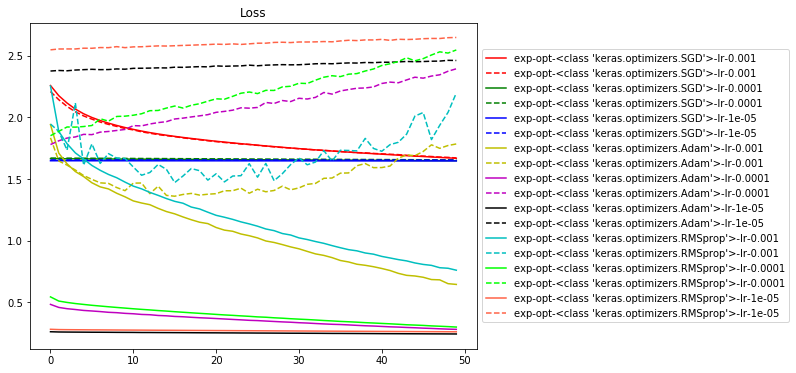

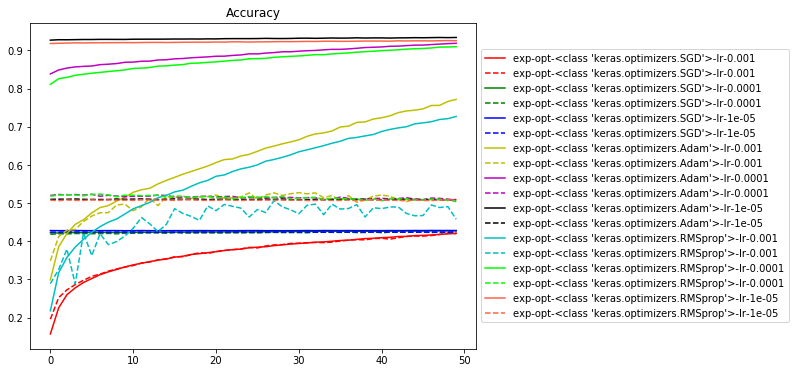

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","lime","tomato"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
#plt.legend(handles=[line_up, line_down])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
#plt.legend()
plt.show()